Data Exploration:
                 Entity Code  Year Smoking mortality
0           Afghanistan  AFG  1990         7.583.769
1  African Region (WHO)  WHO  1990         8.285.964
2               Albania  ALB  1990        14.721.635
3               Algeria  DZA  1990        14.394.376
4        American Samoa  ASM  1990        15.573.251
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             6840 non-null   object
 1   Code               6151 non-null   object
 2   Year               6840 non-null   int64 
 3   Smoking mortality  6840 non-null   object
dtypes: int64(1), object(3)
memory usage: 213.9+ KB
None
              Year
count  6840.000000
mean   2004.500000
std       8.656074
min    1990.000000
25%    1997.000000
50%    2004.500000
75%    2012.000000
max    2019.000000
         Entity Code  Year Smoking mortality
192

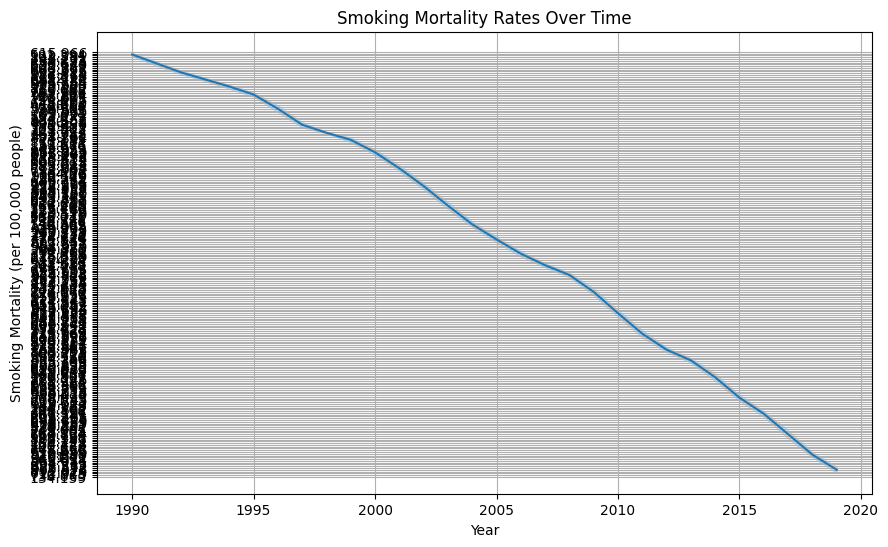

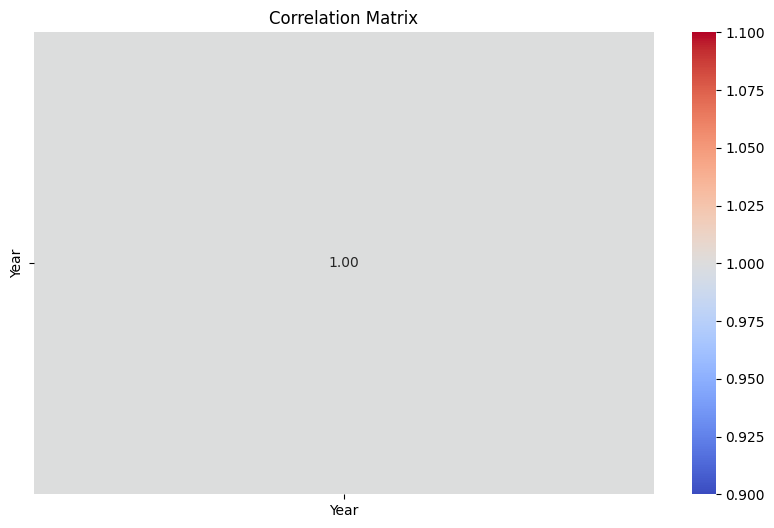

<ipython-input-2-a4dfad49d08f>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sri_lanka_data['Smoking mortality'] = sri_lanka_data['Smoking mortality'].str.replace('[^\d.]', '')
<ipython-input-2-a4dfad49d08f>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sri_lanka_data['Smoking mortality'] = pd.to_numeric(sri_lanka_data['Smoking mortality'], errors='coerce')
<ipython-input-2-a4dfad49d08f>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

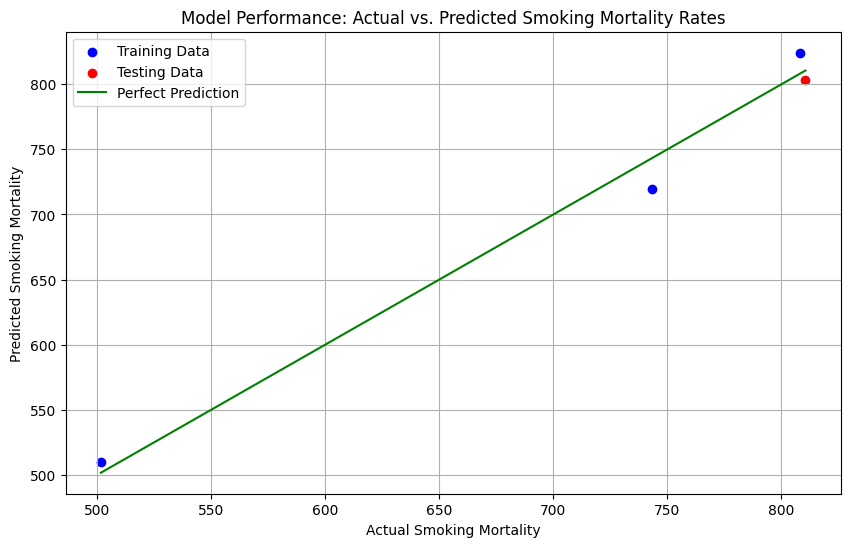

Results:
Train RMSE: 17.33490124479127
Test RMSE: 7.2720999999944524

Interpretation:
The model may be underfitting or generalizing poorly to unseen data.

Validation:
The model may be underfitting or generalizing poorly to unseen data.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Data Understanding and Collection
# Load the CSV file into a DataFrame
data = pd.read_csv('/content/death-rate-smoking new.csv')

# Data Exploration
print("Data Exploration:")
print(data.head())
print(data.info())
print(data.describe())

# Filter the DataFrame to include only records related to Sri Lanka
sri_lanka_data = data[data['Entity'] == 'Sri Lanka']


# Display the filtered DataFrame
print(sri_lanka_data.head())


# Now you can proceed with further preprocessing, analysis, or visualization tasks using this filtered data.

# Remove rows with non-numeric values in the 'Smoking mortality' column
data = data[pd.to_numeric(data['Smoking mortality'], errors='coerce').notna()]

# Filter the DataFrame to include only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Descriptive Analysis: Display summary statistics and distributions of variables
print("\nDescriptive Analysis:")
print(numeric_data.describe())

# Distribution of smoking mortality rates over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Smoking mortality', data=data)
plt.title('Smoking Mortality Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Smoking Mortality (per 100,000 people)')
plt.grid(True)
plt.show()

# Association Analysis: Explore relationships between variables using correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Predictive Analysis: Train a linear regression model to predict smoking mortality rates
# Filter the DataFrame to include only records related to Sri Lanka
sri_lanka_data = data[data['Entity'] == 'Sri Lanka']

# Remove non-numeric characters from the 'Smoking mortality' column
sri_lanka_data['Smoking mortality'] = sri_lanka_data['Smoking mortality'].str.replace('[^\d.]', '')

# Convert 'Smoking mortality' to float
sri_lanka_data['Smoking mortality'] = pd.to_numeric(sri_lanka_data['Smoking mortality'], errors='coerce')

# Drop rows with missing values in the 'Smoking mortality' column
sri_lanka_data.dropna(subset=['Smoking mortality'], inplace=True)
# Selecting relevant columns for prediction
X = sri_lanka_data[['Year']]
y = sri_lanka_data['Smoking mortality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Model evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Visualization of model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')
plt.scatter(y_test, y_pred_test, color='red', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='green', label='Perfect Prediction')
plt.title('Model Performance: Actual vs. Predicted Smoking Mortality Rates')
plt.xlabel('Actual Smoking Mortality')
plt.ylabel('Predicted Smoking Mortality')
plt.legend()
plt.grid(True)
plt.show()


# Evaluation
# Results
print("Results:")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Interpretation
print("\nInterpretation:")
if train_rmse < test_rmse:
    print("The model may be overfitting to the training data.")
elif train_rmse > test_rmse:
    print("The model may be underfitting or generalizing poorly to unseen data.")
else:
    print("The model appears to generalize well to unseen data.")


# Validation
print("\nValidation:")
# Assess if RMSE meets project objectives
if train_rmse < test_rmse:
    print("The model may be overfitting to the training data.")
elif train_rmse > test_rmse:
    print("The model may be underfitting or generalizing poorly to unseen data.")
else:
    print("The model appears to generalize well to unseen data.")